In [2]:
# Import the necessary modules and libraries
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [3]:
#column names are not specified in the data, but are in the folder at https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname']

#cars data
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, names=column_names)

In [4]:
cars.head()

mpg  cylinders  displacement horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0      130.0  3504.0          12.0         70   
1  15.0          8         350.0      165.0  3693.0          11.5         70   
2  18.0          8         318.0      150.0  3436.0          11.0         70   
3  16.0          8         304.0      150.0  3433.0          12.0         70   
4  17.0          8         302.0      140.0  3449.0          10.5         70   

   origin                    carname  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [5]:
#preprocessing step
cars.drop(cars[cars['horsepower'] == '?'].index, inplace = True)
cars.horsepower = pd.to_numeric(cars.horsepower)
cars.reset_index(inplace=True)

In [6]:
# Plot outputs
# scatter plot takes argument of X and y, so we use horsepower as X and mpg as y

#X_columns = ['horsepower']

X = cars[['horsepower']]
y = cars[['mpg']] #I don't know the difference between ['mpg'] and [['mpg']].
#when I used the [['mpg']] than the code works, otherwise the code doesn't work at all.
#

lmodel = linear_model.LinearRegression()
lmodel.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_preds = lmodel.predict(X)

Mean squared error: 23.94
Root Mean Squared Error: 4.89
theta_not: [39.93586102]
theta_one: [-0.15784473]


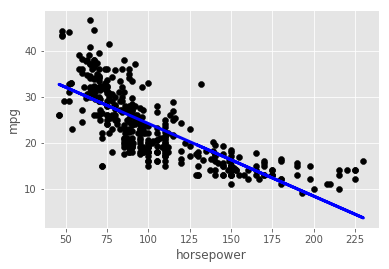

In [8]:
MSE = mean_squared_error(y, y_preds)
print("Mean squared error: %.2f" % MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: %.2f" % RMSE)
A_0 = lmodel.intercept_
A_1 = lmodel.coef_[0]
print('theta_not:', A_0)
print('theta_one:', A_1)

#to plot the graph, it should be 1D array, [[]]means 2D array, which needs two features
X = cars['horsepower']
y = cars['mpg']
plt.scatter(X, y, color='black')
plt.plot(X, y_preds, color='blue', linewidth=3)

plt.xlabel('horsepower')
plt.ylabel('mpg')

plt.show()

Q1 Create a linear regression model to predict the mpg of a car based on horsepower.

Answer: Y = 39.93586102 + -0.15784473X_1

Q1 End

In [9]:
m,n = cars.shape
print('Number of examples: ', m)
print('Number of columns ', n)

Number of examples:  392
Number of columns  10


Mean squared error: 29.49
Root Mean Squared Error: 5.43
Mean squared error: 13.20
Root Mean Squared Error: 3.63


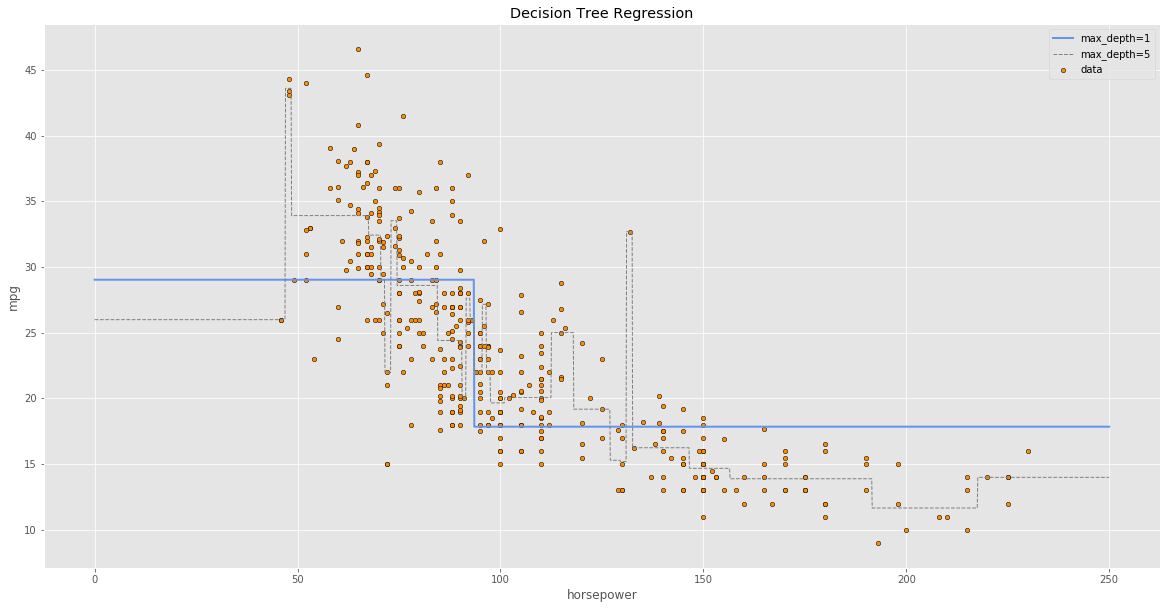

In [10]:
X = cars[['horsepower']]
y = cars['mpg']
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_2 = DecisionTreeRegressor(max_depth=2)
#tree_3 = DecisionTreeRegressor(max_depth=3)
tree_4 = DecisionTreeRegressor(max_depth=5)
#tree_5 = DecisionTreeRegressor(max_depth=8)

tree_1.fit(X, y)
#tree_2.fit(X, y)
#tree_3.fit(X, y)
tree_4.fit(X, y)
#tree_5.fit(X, y)

synth_X = np.linspace(0,250,2000).reshape(-1,1)
y_preds1 = tree_1.predict(synth_X)
#y_preds2 = tree_2.predict(synth_X)
#y_preds3 = tree_3.predict(synth_X)
y_preds4 = tree_4.predict(synth_X)
#y_preds5 = tree_5.predict(synth_X)

y_preds6 = tree_1.predict(X)
y_preds7 = tree_4.predict(X)

MSE_1 = mean_squared_error(y, y_preds6)
print("Mean squared error: %.2f" % MSE_1)
RMSE_1 = np.sqrt(MSE_1)
print("Root Mean Squared Error: %.2f" % RMSE_1)
MSE2 = mean_squared_error(y, y_preds7)
print("Mean squared error: %.2f" % MSE2)
RMSE2 = np.sqrt(MSE2)
print("Root Mean Squared Error: %.2f" % RMSE2)

plt.figure(figsize=(20, 10))

plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

plt.plot(synth_X, y_preds1, color="cornflowerblue",label="max_depth=1", linewidth=2)
#plt.plot(synth_X, y_preds2, color="yellowgreen", label="max_depth=2", linewidth=2)
#plt.plot(synth_X, y_preds3, color="xkcd:pink", label="max_depth=3", linewidth=1)
plt.plot(synth_X, y_preds4, color='grey', label='max_depth=5', linewidth=1, linestyle='dashed')
#plt.plot(synth_X, y_preds5, color='green', label='max_depth=8', linewidth=1, linestyle='dashed')

plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Q2 Again predicting mpg based on horsepower, make a decision tree with a depth of 1. What is the RMSE?

Answer: 5.43

Q2 End

Q3 Make a decision tree with a depth of 5. What is the RMSE?

Answer: 3.63

Q3 End

Q4 (Credit given for any reasonable answer) Which model had the best RMSE? Can we say without a reasonable doubt that this model will predict a new car’s mpg better than the rest? Why or why not?

The decision regression model with max_depth of 5 is the best RMSE that the others, since the model has the smallest RMSE. We cannot say this model will predict a new car's mpg better than the rest, since the model was created based on horsepower instead of the year of cars. Therefore, the model created is not good for predicting whether a new car's mpg better than the rests.

Q4 End

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys

def get_tree_graph(tree):
    def conda_fix(graph):
            path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
            paths = ("dot", "twopi", "neato", "circo", "fdp")
            paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
            graph.set_graphviz_executables(paths)

    dot_data = StringIO() 

    export_graphviz(tree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

    conda_fix(graph)
    
    #tree_1 max_depth1
    return Image(graph.create_png())

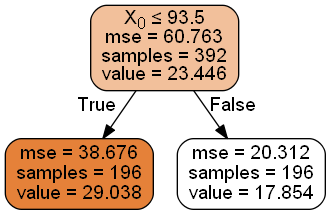

In [12]:
get_tree_graph(tree_1)

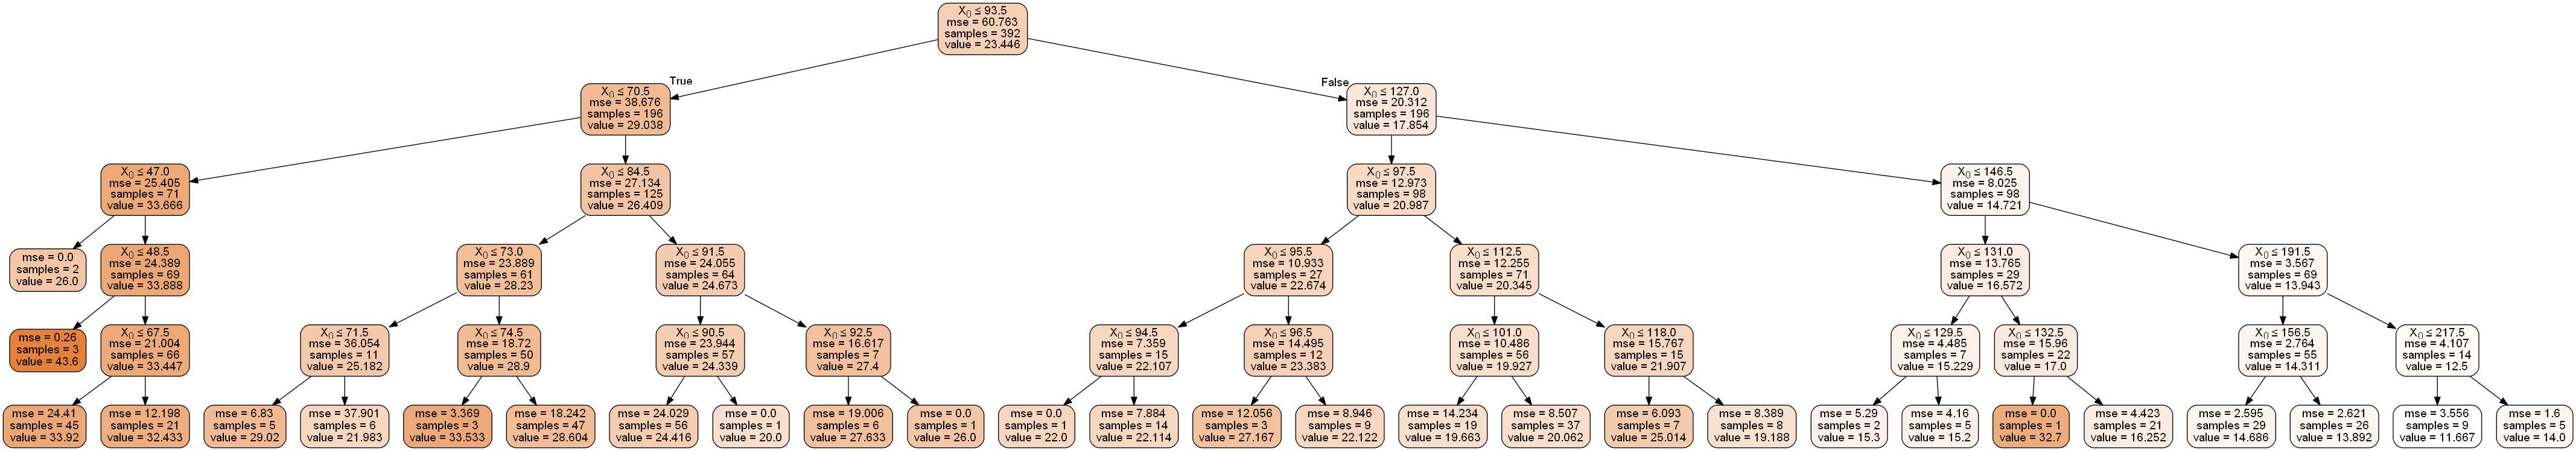

In [13]:
get_tree_graph(tree_4)